# Geolocation project

## Get and Pre-process the DBpedia location data

#### Distributed Data and Data Engineering Spring 2020

#### By: Sam Watson

Upload  the  large-scale  clustering  data  of  (latitude,  longitude)  pairs  extracted  from  DB- pedia (lat_longs.zip) to S3. Each record represents a location/place that has a Wikipedia article and latitude/longitude information. The format is: lat long name_of_page. In total, there are 450,151 points in a 2D space (i.e., space with spherical geometry – maybe it would make sense to use the great circle distance when analyzing this data...). To get a smaller sample of this dataset for testing purposes, you could put a bounding box around the  US  and  filter  only  those  records  inside  the  bounding  box.  Try  to  visualize  this  data.  Eventually, you want to cluster the whole world using the entire dataset

In [1]:
#importing pyspark
from pyspark import SparkContext

In [2]:
#getting SparkContext
sc=SparkContext.getOrCreate()

In [3]:
filepath="s3a://geocluster/dataset3"

In [10]:
#retrieving the dataset
lines=sc.textFile(str(filepath)+"/lat_longs.txt")

In [11]:
lines.take(10)

[u'36.7 3.216666666666667 <http://dbpedia.org/resource/Algeria>',
 u'42.5 1.5166666666666666 <http://dbpedia.org/resource/Andorra>',
 u'12.516666666666667 -70.03333333333333 <http://dbpedia.org/resource/Aruba>',
 u'-8.833333333333334 13.333333333333334 <http://dbpedia.org/resource/Angola>',
 u'41.333333333333336 19.8 <http://dbpedia.org/resource/Albania>',
 u'34.53333333333333 69.13333333333334 <http://dbpedia.org/resource/Afghanistan>',
 u'40.416666666666664 49.833333333333336 <http://dbpedia.org/resource/Azerbaijan>',
 u'39.93333333333333 32.86666666666667 <http://dbpedia.org/resource/Ankara>',
 u'52.36666666666667 4.9 <http://dbpedia.org/resource/Amsterdam>',
 u'50.46 2.13 <http://dbpedia.org/resource/Azincourt>']

In [18]:
data=lines.map(lambda element: element.split(" "))

In [19]:
data.take(5)

[[u'36.7', u'3.216666666666667', u'<http://dbpedia.org/resource/Algeria>'],
 [u'42.5', u'1.5166666666666666', u'<http://dbpedia.org/resource/Andorra>'],
 [u'12.516666666666667',
  u'-70.03333333333333',
  u'<http://dbpedia.org/resource/Aruba>'],
 [u'-8.833333333333334',
  u'13.333333333333334',
  u'<http://dbpedia.org/resource/Angola>'],
 [u'41.333333333333336', u'19.8', u'<http://dbpedia.org/resource/Albania>']]

In [35]:
lats=data.map(lambda x: x[0]).collect()
longs=data.map(lambda x: x[1]).collect()

#### To plot only some of the values, I'm making a rough box around just the USA-ish values

In [36]:
def floatconvertUSABOX(l1,l2):
    l3=[]
    l4=[]
    for i in range(len(l1)):
        try:
            if 25 <= float(l1[i]) <= 47:
                if -124 <= float(l2[i]) <= -68:
                    l3.append(float(l1[i]))
                    l4.append(float(l2[i]))
        except:
            continue
    return l3,l4

In [42]:
lats,longs=floatconvertUSABOX(lats,longs)

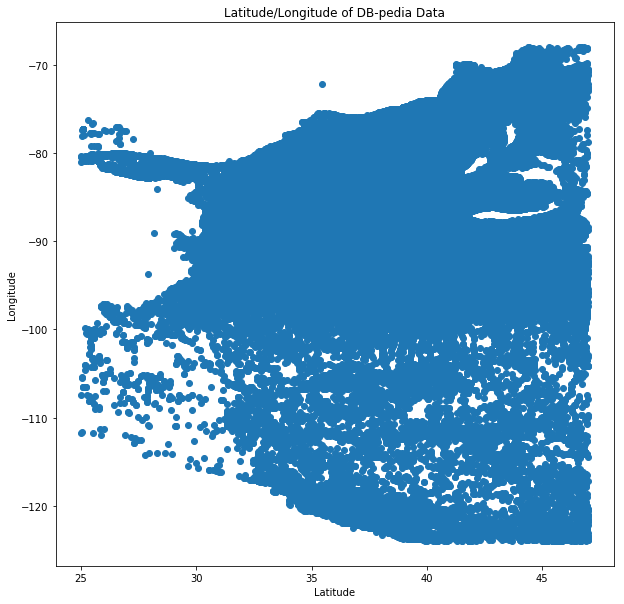

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(lats,longs)
plt.title("Latitude/Longitude of DB-pedia Data")
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()